In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import datasets, model_selection, linear_model, metrics
from sklearn import pipeline
from sklearn import svm

In [2]:
Xdf=pd.read_csv('./hw3/hw3_problem_5_X.csv')
ydf=pd.read_csv('./hw3/hw3_problem_5_y.csv')
Xdf_blind=pd.read_csv('./hw3/hw3_problem_5_X_blind.csv')
X=np.array(Xdf.values[:,1:],dtype=np.float64)
y=np.array(ydf.values[:,1],dtype=np.float64)
X_blind=np.array(Xdf_blind.values[:,1:],dtype=np.float64)
X_train,X_valid,y_train,y_valid=model_selection.train_test_split(X,y,random_state=42)


Text(0, 0.5, '% Variance Explained')

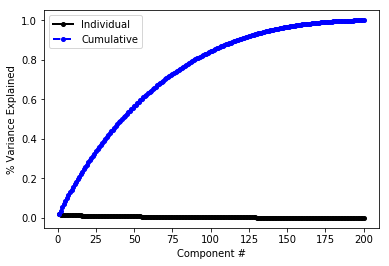

In [3]:
pca=decomposition.PCA(n_components=200)
X_fit=pca.fit(X_train)
fig=plt.figure(figsize=[6,4])
plt.plot(np.arange(1,201),pca.explained_variance_ratio_[:201],'k.-',lw=2,ms=8,label='Individual')
plt.plot(np.arange(1,201),np.cumsum(pca.explained_variance_ratio_[:201]),'b.--',lw=2,ms=8, label='Cumulative')
plt.legend()
plt.xlabel('Component #')
plt.ylabel('% Variance Explained')



The number of components I choose is 75 when the variance is 0.8.

In [4]:
pca2=decomposition.PCA(n_components=200)
n_comp=np.arange(1,9,1)
g=np.logspace(-4,0,50)
C=np.logspace(-10,2,50)
cls=svm.SVC(kernel='rbf',gamma=0.1,C=0.5)
pipe=pipeline.Pipeline([('pca2',pca2),('cls',cls)])

pipe.fit(X_train,y_train)

pipe.get_params().keys()

dict_keys(['memory', 'steps', 'pca2', 'cls', 'pca2__copy', 'pca2__iterated_power', 'pca2__n_components', 'pca2__random_state', 'pca2__svd_solver', 'pca2__tol', 'pca2__whiten', 'cls__C', 'cls__cache_size', 'cls__class_weight', 'cls__coef0', 'cls__decision_function_shape', 'cls__degree', 'cls__gamma', 'cls__kernel', 'cls__max_iter', 'cls__probability', 'cls__random_state', 'cls__shrinking', 'cls__tol', 'cls__verbose'])

In [5]:
param_grid={'pca2__n_components':n_comp,'cls__gamma':g,'cls__C':C}
gscv=model_selection.GridSearchCV(pipe,param_grid,scoring='roc_auc',cv=3,iid=False,return_train_score=False)
gscv.fit(X,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca2', PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('cls', SVC(C=0.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=False, n_jobs=None,
       param_grid={'pca2__n_components': array([1, 2, 3, 4, 5, 6, 7, 8]), 'cls__gamma': array([1.00000e-04, 1.20679e-04, 1.45635e-04, 1.75751e-04, 2.12095e-04,
       2.55955e-04, 3.08884e-04, 3.72759e-04, 4.49843e-04, 5.42868e-04,
       6.55129e-04, 7.90604e-04, 9.54095e-04, 1.15140e-03, 1.38950e-03,
   ... 3.39322e+00, 5.96362e+00,
       1.04811e+01, 1.84207e+01, 3.23746e+01, 5.68987e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
   

In [6]:
print(gscv.best_params_,gscv.best_score_)

{'cls__C': 3.39322177189533, 'cls__gamma': 0.00014563484775012445, 'pca2__n_components': 7} 0.7314203722624185


In [7]:
y_blind_predicted=[]
pca_pred=decomposition.PCA(n_components=7)
cls_pred=svm.SVC(kernel='rbf',gamma=gscv.best_params_['cls__gamma'],C=gscv.best_params_['cls__C'])
pipe_pred=pipeline.Pipeline([('pca2',pca_pred),('cls',cls_pred)])
pipe_pred.fit(X_train,y_train)
y_blind_predicted.append(pipe_pred.predict(X_blind))
print(y_blind_predicted)    
Xdf=pd.DataFrame(y_blind_predicted)
Xdf.to_csv('./hw3_hw3_problem_5_y_blind_predicted5.csv')
np.shape(Xdf)

[array([0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 0., 1.])]


(1, 125)